<a href="https://colab.research.google.com/github/Joe-rini/nlp-specialization-colab/blob/main/C1W3_L3_PCA_Embeddings_Reconstruction_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C1W3_L3 (Extended): PCA Projection and Reconstruction

Welcome to the final lesson of Week 3: Embeddings & Similarity. So far you've learned how to represent words as vectors, manipulate them algebraically (e.g., king - man + woman ≈ queen), and use cosine similarity to compare meaning. We also visualized embeddings in 2D and 3D, but we didn't explain HOW those visualizations were generated from high dimensional vectors.

In this notebook, we'll dive a bit deeper into visualization, and how Principal Componenet Analysis (PCA) works.Welcome to this extended lesson where you'll **see PCA in action** — not just for visualization, but also for recovering original data.

By projecting to 2D and then reconstructing back to the original space, you'll develop an intuition for:
- What PCA throws away
- What it keeps
- How close reconstructions can be when we reduce dimensions

### 📐 What is PCA and Why Use It?

- PCA finds **uncorrelated directions** in your data — these are called **principal components**.
- It sorts those directions by **how much variance** they capture (from most to least).
- You can then **project** your high-dimensional data onto the top 2 or 3 components for visualization.

This is done using **eigenvectors** (directions) and **eigenvalues** (strength of those directions). You can think of PCA as identifying the "average" or dominant directions in your high-dimensional space — the axes along which your data tends to spread out most. **These become your new coordinate system.**


## 🧪 Toy 3D Example for PCA
This example creates a small 3D dataset with simple structure. We'll use it to:
- Apply PCA (3D → 2D)
- Reconstruct the original data (2D → approx 3D)
- Visualize how close the reconstruction is.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

Let's input some 3D data. Will use something very tangeble. The height, weight and age of 3 individuals. Let's input that data

In [ ]:
# Step 1: Define data
# Each row is a person: [height (cm), weight (kg), age (years)]
X = np.array([
    [160, 55, 25],  # Alice
    [170, 65, 30],  # Bob
    [180, 70, 35]   # Carol
])
labels = ['Alice', 'Bob', 'Carol']

Let's view the data points in a matrix

In [ ]:
print(X)

[[160  55  25]
 [170  65  30]
 [180  70  35]]


And let's look at it in a table. Notice the average and standard deviation. Reminder: Standard deviation measures how spread out the values are around the mean whether they are spread out or close to the mean.

In [ ]:
# Create DataFrame
df = pd.DataFrame(data)

# Compute mean and standard deviation (SD)
numeric_data = df.iloc[:, 1:]
average = numeric_data.mean()
std_dev = numeric_data.std()

# Append average and SD as new rows
summary_df = df.copy()
summary_df.loc["Average"] = ["—"] + list(np.round(average, 2))
summary_df.loc["Std Dev"] = ["—"] + list(np.round(std_dev, 2))

# Display the table
summary_df

,Person,Height (cm),Weight (kg),Age (years)
0,Alice,160.0,55.00,25.0
1,Bob,170.0,65.00,30.0
2,Carol,180.0,70.00,35.0
Average,—,170.0,63.33,30.0
Std Dev,—,10.0,7.64,5.0


Calculate X meaned: this is just a trick to center the data by removing the column average from each value. The differences will remain. Centering shifts the cloud of data so that it is centered at the origin (0, 0, 0) in n-dimensional space.

This ensures that: The first principal component will go through the center of the data. You could hand calculate calculate that from the averages in the table above, or use the Python function.



In [ ]:
X_meaned = X - X.mean(axis=0)
print(X_meaned)

[[-10.          -8.33333333  -5.        ]
 [  0.           1.66666667   0.        ]
 [ 10.           6.66666667   5.        ]]


Now we need to find the covariance between features. It captures how your features vary and co-vary.

Take a simple example: If taller people tend to weigh more

- cov(height, weight) will be positive
- If age is unrelated to weight, cov(weight, age) will be near zero


In [ ]:
cov_matrix = np.cov(X_meaned, rowvar=False)
print(cov_matrix)

[[100.          75.          50.        ]
 [ 75.          58.33333333  37.5       ]
 [ 50.          37.5         25.        ]]


Strongest relationships:

- Height & Weight: 75
- Height & Age: 50
- Weight & Age: 37.5

This means your first principal component (PC1) will be a blend of all three, because they all increase together.

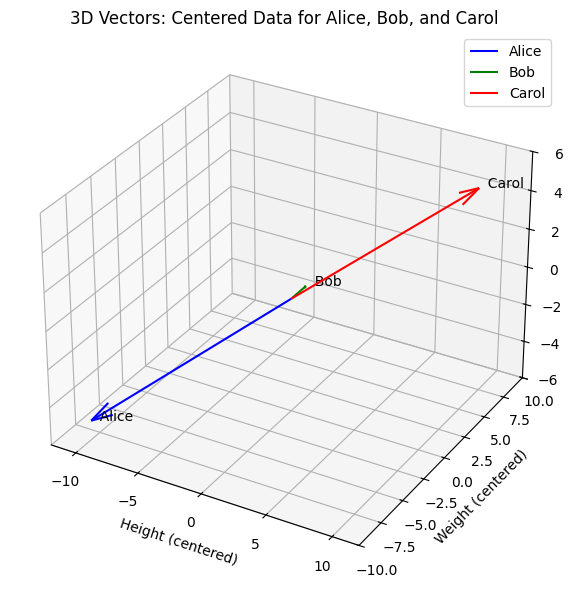

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Recreate the centered data (X_meaned)
X_meaned = np.array([
    [-10, -8.33, -5],
    [0, 1.67, 0],
    [10, 6.67, 5]
])

labels = ['Alice', 'Bob', 'Carol']

# Create 3D vector plot from origin to each centered data point
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

origin = np.zeros(3)
colors = ['blue', 'green', 'red']

for i, vec in enumerate(X_meaned):
    ax.quiver(*origin, *vec, color=colors[i], label=labels[i], arrow_length_ratio=0.1)
    ax.text(*vec, f"  {labels[i]}", fontsize=10)

ax.set_xlim([-12, 12])
ax.set_ylim([-10, 10])
ax.set_zlim([-6, 6])
ax.set_xlabel('Height (centered)')
ax.set_ylabel('Weight (centered)')
ax.set_zlabel('Age (centered)')
ax.set_title("3D Vectors: Centered Data for Alice, Bob, and Carol")
ax.legend()
plt.tight_layout()
plt.show()

Here is your 3D vector plot of the mean-centered data for Alice, Bob, and Carol:

Each arrow originates from the origin
(
0
,
0
,
0
)
(0,0,0) and points to a person's centered feature vector.

Because the data is mean-centered, the arrows reflect how each person deviates from the average in:

Height

Weight

Age

📊 Visually, you can see:

Alice is "below average" on all three features.

Bob is close to the average.

Carol is "above average" on all three.

Now let's repeat this with the packages

In [ ]:
# Step 2: Apply PCA (3D → 2D)
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

In [ ]:
# Step 3: Reconstruct (2D → approx 3D)
X_reconstructed = pca.inverse_transform(X_2D)

In [ ]:
# Step 4: Compare a few rows
print("Original X (first 3 rows):")
print(X[:3])

print("\nReconstructed X (first 3 rows):")
print(np.round(X_reconstructed[:3], 2))

Original X (first 3 rows):
[[160  55  25]
 [170  65  30]
 [180  70  35]]

Reconstructed X (first 3 rows):
[[160.  55.  25.]
 [170.  65.  30.]
 [180.  70.  35.]]


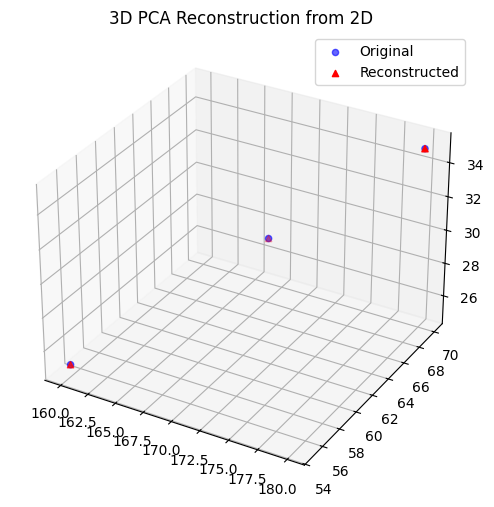

In [ ]:
# Step 5: Visualize original vs reconstructed
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Original points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='blue', label='Original', alpha=0.6)

# Reconstructed points
ax.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], X_reconstructed[:, 2],
           c='red', label='Reconstructed', marker='^')

# Connect original and reconstructed points
for orig, recon in zip(X, X_reconstructed):
    ax.plot([orig[0], recon[0]], [orig[1], recon[1]], [orig[2], recon[2]], c='gray', alpha=0.4)

ax.set_title("3D PCA Reconstruction from 2D")
ax.legend()
plt.show()

## 📌 Key Insight
When reducing dimensions via PCA, **you lose some information** — but not all.

You can reconstruct an approximation of the original data:
- If you keep **all** components → you recover the data exactly
- If you keep **some**, the result is a lower-rank approximation

Here, you saw how PCA projects into a lower-dimensional space, and how **the top components retain most of the structure**.

### 📌 Summary: PCA Intuition

- **Eigenvectors** give the directions of the new coordinate axes — they represent **uncorrelated features** that capture the structure of the data.
- **Eigenvalues** indicate how much variance (spread) there is along each new axis — the larger the eigenvalue, the more important that axis is.
- **Dot products** between your data and eigenvectors tell you how much of your data "lands on" each principal component — i.e., the projection onto the new axes.

👉 PCA works by rotating your coordinate system to align with the directions of greatest variance in the data — then keeping only the most meaningful axes.